## Importing the necessary libraries

In [1]:
## For data manipulation
import pandas as pd

## For numerical computations
import numpy as np

## For Visualizations
import seaborn as sns 
import matplotlib.pyplot as plt

## Importing the dataset needed for the analysis

In [1]:
## Import the data here

## Importing and formatting the ML dataset to work with the dataset.

In [3]:
## Importing the dataset
ml_anon = pd.read_csv("File path")

In [4]:
## Dropping the irrelevant index attached by default to the dataset.
ml_anon.drop("Unnamed: 0", inplace=True, axis=1)

In [5]:
## Creating a column in the ML dataset that has the same format as the "Is Sybil? (T or F)" column in the reviewers dataset
ml_anon["Is Sybil? (T or F)"] = np.where(ml_anon.prediction_score == 1, "T", "F")

In [6]:
## Checking to make sure the created column is included in the dataset.
ml_anon.columns

Index(['handle', 'prediction_score', 'prediction_confidence', 'quant_1',
       'quant_2', 'quant_3', 'quant_4', 'quant_5', 'quant_6', 'quant_7',
       'Is Sybil? (T or F)'],
      dtype='object')

In [7]:
# Storing each reviewer dataset in a list, for easy iteration.
## The ML dataset is also included.

names = [adebola, am, ann, anuj, elbeth, bfa, gold, bob, lkh, waka, trice, proof, emmanuel, fizzy, dog, flob, emma_j, greg,
        grey, stel, jshua, kish, kylin, z4yr, hound, mount, nadalie, richard, ogunjo, robot, steeges, vik, socal, wolfman,
         zer,ml_anon ]

In [8]:
# Making a loop through all the datasheet of human evaluation,
# then renaming the Unnamed: 0 column to handle so that all the data used for the analysis have a column in common
for i in names:
    i.rename({"Unnamed: 0": "handle"}, axis=1, inplace=True)

In [9]:
def namestr(obj, namespace):
    """
    This function makes it posible to retrive the name of a variable (stored_data).
    """
    
    return [name for name in namespace if namespace[name] is obj]


In [10]:
def create_table(data1, data2):
    
    """
    This function creates a table for any two reviewer that share common handles reviewed.
    """
    
    df = pd.DataFrame()
    
    df = data1.merge(data2, on="handle", suffixes=(namestr(data1, globals())[0], namestr(data2, globals())[0]))
    
    df.dropna(subset=["Is Sybil? (T or F)" +namestr(data1, globals())[0], "Is Sybil? (T or F)" +namestr(data2, globals())[0]],
             inplace=True)
    
    return df

In [11]:
## This cell loops through 

def find_common_handles(name):
    
    """
    This function loops through the list of reviewers data and returns the each reviewer and number of handles they have in 
    common with the "name" given.
    """
    freq=[]
    for i in names:
        freq.append([namestr(i, globals())[0], create_table(name, i).shape[0]])
    return freq

In [12]:
def total_agreement(data, name1, name2):
    
    """
    This function calculates the total agreement of between any two reviewer.
    Ranges from 0 to 1.
    A score of 1 denotes they made the same call on all handles the reviewed in common.
    A score of 0 denotes they made the different call on all handles the reviewed in common.
    """
    
    lenght = data.shape[0]
    
    count = data.loc[data["Is Sybil? (T or F)" + name1] == data["Is Sybil? (T or F)" + name2]].shape[0]
    
    agreements = count
    
    return agreements/lenght
    

In [13]:
def total_disagreement(data, name1, name2):
    
    """
    This function calculates the total disagreement of between any two reviewer.
    Ranges from 0 to 1.
    A score of 0 denotes they made the same call on all handles the reviewed in common.
    A score of 1 denotes they made the different call on all handles the reviewed in common.
    """
    
    lenght = data.shape[0]
    
    count = data.loc[data["Is Sybil? (T or F)" + name1] != data["Is Sybil? (T or F)" + name2]].shape[0]
    
    disagreements = count
    
    return disagreements/lenght

## Fizzy Interreliability 

In [14]:
find_common_handles(fizzy)

[['adebola', 0],
 ['am', 0],
 ['ann', 0],
 ['anuj', 1],
 ['elbeth', 4],
 ['bfa', 2],
 ['gold', 3],
 ['bob', 2],
 ['lkh', 1],
 ['waka', 0],
 ['trice', 1],
 ['proof', 0],
 ['emmanuel', 0],
 ['fizzy', 60],
 ['dog', 0],
 ['flob', 1],
 ['emma_j', 0],
 ['greg', 1],
 ['grey', 1],
 ['stel', 2],
 ['jshua', 0],
 ['kish', 0],
 ['kylin', 0],
 ['z4yr', 1],
 ['hound', 2],
 ['mount', 2],
 ['nadalie', 1],
 ['richard', 4],
 ['ogunjo', 0],
 ['robot', 0],
 ['steeges', 1],
 ['vik', 1],
 ['socal', 3],
 ['wolfman', 1],
 ['zer', 2],
 ['ml_anon', 48]]

In [15]:
## creating tables from those with atleast 3 common columns

fiz_ric = create_table(fizzy, richard)
fiz_elb = create_table(fizzy, elbeth)
fiz_gold = create_table(fizzy, gold)
## You can create a dataset like this for the others.
fiz_ml = create_table(fizzy, ml_anon)

In [16]:
total_agreement(fiz_ric, "fizzy", "richard"), total_agreement(fiz_elb, "fizzy", "elbeth"), total_agreement(fiz_gold, "fizzy", "gold"), total_agreement(fiz_ml, "fizzy", "ml_anon")

(0.5, 0.0, 0.6666666666666666, 0.6666666666666666)

## Elbeth

In [17]:
find_common_handles(elbeth)

[['adebola', 0],
 ['am', 0],
 ['ann', 0],
 ['anuj', 1],
 ['elbeth', 60],
 ['bfa', 3],
 ['gold', 1],
 ['bob', 0],
 ['lkh', 2],
 ['waka', 0],
 ['trice', 5],
 ['proof', 2],
 ['emmanuel', 0],
 ['fizzy', 4],
 ['dog', 1],
 ['flob', 2],
 ['emma_j', 1],
 ['greg', 1],
 ['grey', 1],
 ['stel', 0],
 ['jshua', 1],
 ['kish', 0],
 ['kylin', 2],
 ['z4yr', 3],
 ['hound', 2],
 ['mount', 4],
 ['nadalie', 0],
 ['richard', 3],
 ['ogunjo', 0],
 ['robot', 0],
 ['steeges', 0],
 ['vik', 1],
 ['socal', 2],
 ['wolfman', 0],
 ['zer', 1],
 ['ml_anon', 43]]

In [18]:
elb_rich = create_table(elbeth, richard)
elb_mount = create_table(elbeth, mount)
elb_z4yr = create_table(elbeth, z4yr)
elb_trice = create_table(elbeth, trice)
elb_fiz = create_table(elbeth, fizzy)
elb_ml = create_table(elbeth, ml_anon)

In [19]:
[total_agreement(elb_fiz, "elbeth", "fizzy"), total_agreement(elb_rich, "elbeth", "richard"),
 total_agreement(elb_mount, "elbeth", "mount"), total_agreement(elb_z4yr,"elbeth", "z4yr"),
 total_agreement(elb_trice,"elbeth", "trice"), total_agreement(elb_ml, "elbeth", "ml_anon")]

[0.0, 0.3333333333333333, 0.75, 0.6666666666666666, 0.6, 0.46511627906976744]

## BFA

In [20]:
find_common_handles(bfa)

[['adebola', 0],
 ['am', 0],
 ['ann', 0],
 ['anuj', 1],
 ['elbeth', 3],
 ['bfa', 60],
 ['gold', 3],
 ['bob', 1],
 ['lkh', 1],
 ['waka', 0],
 ['trice', 1],
 ['proof', 1],
 ['emmanuel', 1],
 ['fizzy', 2],
 ['dog', 5],
 ['flob', 2],
 ['emma_j', 1],
 ['greg', 0],
 ['grey', 1],
 ['stel', 0],
 ['jshua', 2],
 ['kish', 3],
 ['kylin', 0],
 ['z4yr', 0],
 ['hound', 0],
 ['mount', 2],
 ['nadalie', 1],
 ['richard', 2],
 ['ogunjo', 0],
 ['robot', 0],
 ['steeges', 0],
 ['vik', 2],
 ['socal', 1],
 ['wolfman', 1],
 ['zer', 0],
 ['ml_anon', 39]]

In [22]:
bfa_elbeth = create_table(bfa, elbeth)
bfa_gold = create_table(bfa, gold)
bfa_dog = create_table(bfa, dog)
bfa_kish = create_table(bfa, kish)
bfa_ml = create_table(bfa, ml_anon)

In [23]:
[total_agreement(bfa_elbeth, "bfa", "elbeth"), total_agreement(bfa_gold, "bfa", "gold"),
 total_agreement(bfa_dog, "bfa", "dog"), total_agreement(bfa_kish,"bfa", "kish"),
 total_agreement(bfa_ml, "bfa", "ml_anon")]

[0.6666666666666666, 1.0, 0.8, 0.6666666666666666, 0.5128205128205128]

## Gold

In [24]:
find_common_handles(gold)

[['adebola', 0],
 ['am', 0],
 ['ann', 0],
 ['anuj', 0],
 ['elbeth', 1],
 ['bfa', 3],
 ['gold', 60],
 ['bob', 0],
 ['lkh', 3],
 ['waka', 0],
 ['trice', 1],
 ['proof', 1],
 ['emmanuel', 1],
 ['fizzy', 3],
 ['dog', 1],
 ['flob', 1],
 ['emma_j', 1],
 ['greg', 0],
 ['grey', 0],
 ['stel', 1],
 ['jshua', 2],
 ['kish', 0],
 ['kylin', 2],
 ['z4yr', 4],
 ['hound', 0],
 ['mount', 1],
 ['nadalie', 2],
 ['richard', 1],
 ['ogunjo', 1],
 ['robot', 1],
 ['steeges', 1],
 ['vik', 0],
 ['socal', 0],
 ['wolfman', 1],
 ['zer', 3],
 ['ml_anon', 42]]

In [25]:
gold_bfa = create_table(gold, bfa)
gold_lkh = create_table(gold, lkh)
gold_fizzy = create_table(gold, fizzy)
gold_z4yr = create_table(gold, z4yr)
gold_robot = create_table(gold, robot)
gold_zer = create_table(gold, zer)
gold_ml = create_table(gold, ml_anon)

In [26]:
[total_agreement(gold_bfa, "gold", "bfa"), total_agreement(gold_lkh, "gold", "lkh"),
 total_agreement(gold_fizzy, "gold", "fizzy"), total_agreement(gold_z4yr,"gold", "z4yr"),
 total_agreement(gold_robot,"gold", "robot"), total_agreement(gold_zer,"gold", "zer"),
 total_agreement(gold_ml, "gold", "ml_anon")]

[1.0,
 0.3333333333333333,
 0.6666666666666666,
 0.75,
 0.0,
 0.6666666666666666,
 0.7142857142857143]

## BOB

In [27]:
find_common_handles(bob)

[['adebola', 1],
 ['am', 1],
 ['ann', 0],
 ['anuj', 1],
 ['elbeth', 0],
 ['bfa', 1],
 ['gold', 0],
 ['bob', 60],
 ['lkh', 3],
 ['waka', 2],
 ['trice', 0],
 ['proof', 1],
 ['emmanuel', 0],
 ['fizzy', 2],
 ['dog', 1],
 ['flob', 1],
 ['emma_j', 2],
 ['greg', 1],
 ['grey', 3],
 ['stel', 1],
 ['jshua', 0],
 ['kish', 2],
 ['kylin', 0],
 ['z4yr', 6],
 ['hound', 1],
 ['mount', 0],
 ['nadalie', 3],
 ['richard', 2],
 ['ogunjo', 1],
 ['robot', 1],
 ['steeges', 1],
 ['vik', 1],
 ['socal', 0],
 ['wolfman', 1],
 ['zer', 1],
 ['ml_anon', 45]]

In [29]:
bob_lkh = create_table(bob, lkh)
bob_waka = create_table(bob, waka)
bob_grey = create_table(bob, grey)
bob_z4yr = create_table(bob, z4yr)
bob_nadalie = create_table(bob, nadalie)
bob_ml = create_table(bob, ml_anon)

In [30]:
[total_agreement(bob_lkh, "bob", "lkh"), total_agreement(bob_waka, "bob", "waka"),
 total_agreement(bob_grey, "bob", "grey"), total_agreement(bob_z4yr,"bob", "z4yr"),
 total_agreement(bob_nadalie,"bob", "nadalie"), total_agreement(bob_ml, "bob", "ml_anon")]

[1.0, 1.0, 1.0, 0.8333333333333334, 1.0, 0.5777777777777777]

## LKH

In [31]:
find_common_handles(lkh)

[['adebola', 0],
 ['am', 0],
 ['ann', 0],
 ['anuj', 1],
 ['elbeth', 2],
 ['bfa', 1],
 ['gold', 3],
 ['bob', 3],
 ['lkh', 60],
 ['waka', 0],
 ['trice', 2],
 ['proof', 2],
 ['emmanuel', 2],
 ['fizzy', 1],
 ['dog', 3],
 ['flob', 2],
 ['emma_j', 1],
 ['greg', 1],
 ['grey', 0],
 ['stel', 3],
 ['jshua', 1],
 ['kish', 1],
 ['kylin', 2],
 ['z4yr', 3],
 ['hound', 4],
 ['mount', 1],
 ['nadalie', 2],
 ['richard', 4],
 ['ogunjo', 3],
 ['robot', 0],
 ['steeges', 1],
 ['vik', 1],
 ['socal', 2],
 ['wolfman', 2],
 ['zer', 0],
 ['ml_anon', 42]]

In [32]:
lkh_gold = create_table(lkh, gold)
lkh_bob = create_table(lkh, bob)
lkh_dog = create_table(lkh, dog)
lkh_stel = create_table(lkh, stel)
lkh_z4yr = create_table(lkh, z4yr)
lkh_hound = create_table(lkh, hound)
lkh_ogunjo = create_table(lkh, ogunjo)
lkh_ml= create_table(lkh, ml_anon)

In [33]:
[total_agreement(lkh_gold, "lkh", "gold"), total_agreement(lkh_bob, "lkh", "bob"),
 total_agreement(lkh_dog, "lkh", "dog"), total_agreement(lkh_stel,"lkh", "stel"),
 total_agreement(lkh_z4yr,"lkh", "z4yr"), total_agreement(lkh_hound,"lkh", "hound"),
  total_agreement(lkh_ogunjo,"lkh", "ogunjo"), total_agreement(lkh_ml, "lkh", "ml_anon")]

[0.3333333333333333,
 1.0,
 0.6666666666666666,
 0.0,
 0.3333333333333333,
 1.0,
 0.6666666666666666,
 0.6190476190476191]

## Waka

In [34]:
find_common_handles(waka)

[['adebola', 0],
 ['am', 1],
 ['ann', 0],
 ['anuj', 0],
 ['elbeth', 0],
 ['bfa', 0],
 ['gold', 0],
 ['bob', 2],
 ['lkh', 0],
 ['waka', 30],
 ['trice', 0],
 ['proof', 1],
 ['emmanuel', 0],
 ['fizzy', 0],
 ['dog', 0],
 ['flob', 2],
 ['emma_j', 0],
 ['greg', 1],
 ['grey', 2],
 ['stel', 0],
 ['jshua', 0],
 ['kish', 0],
 ['kylin', 0],
 ['z4yr', 0],
 ['hound', 0],
 ['mount', 1],
 ['nadalie', 1],
 ['richard', 0],
 ['ogunjo', 2],
 ['robot', 1],
 ['steeges', 2],
 ['vik', 0],
 ['socal', 2],
 ['wolfman', 0],
 ['zer', 0],
 ['ml_anon', 17]]

In [35]:
waka_bob = create_table(waka, bob)
waka_flob = create_table(waka, flob)
waka_ogunjo = create_table(waka, ogunjo)
waka_steeges = create_table(waka, steeges)
waka_greg = create_table(waka, greg)
waka_grey = create_table(waka, grey)
waka_socal = create_table(waka, socal)
waka_ml =create_table(waka, ml_anon)

In [36]:
[total_agreement(waka_bob, "waka", "bob"),total_agreement(waka_flob, "waka", "flob"),
 
 total_agreement(waka_ogunjo,"waka", "ogunjo"),total_agreement(waka_steeges,"waka", "steeges"),
 
 total_agreement(waka_greg,"waka", "greg"), total_agreement(waka_grey,"waka", "grey"),
 
 total_agreement(waka_socal,"waka", "socal"), total_agreement(waka_ml, "waka", "ml_anon")]

[1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.8235294117647058]

## Trice

In [37]:
find_common_handles(trice)

[['adebola', 0],
 ['am', 0],
 ['ann', 0],
 ['anuj', 0],
 ['elbeth', 5],
 ['bfa', 1],
 ['gold', 1],
 ['bob', 0],
 ['lkh', 2],
 ['waka', 0],
 ['trice', 60],
 ['proof', 0],
 ['emmanuel', 2],
 ['fizzy', 1],
 ['dog', 2],
 ['flob', 1],
 ['emma_j', 0],
 ['greg', 2],
 ['grey', 2],
 ['stel', 1],
 ['jshua', 1],
 ['kish', 1],
 ['kylin', 2],
 ['z4yr', 2],
 ['hound', 1],
 ['mount', 1],
 ['nadalie', 1],
 ['richard', 2],
 ['ogunjo', 2],
 ['robot', 0],
 ['steeges', 0],
 ['vik', 2],
 ['socal', 3],
 ['wolfman', 0],
 ['zer', 2],
 ['ml_anon', 39]]

In [39]:
trice_socal = create_table(trice, socal)
trice_elbeth = create_table(trice, elbeth)
trice_lkh = create_table(trice, lkh)
trice_emmanuel = create_table(trice, emmanuel)
trice_greg = create_table(trice, greg)
trice_grey = create_table(trice, grey)
trice_kylin = create_table(trice, kylin)
trice_z4yr = create_table(trice, z4yr)
trice_richard = create_table(trice, richard)
trice_ogunjo = create_table(trice, ogunjo)
trice_vik = create_table(trice, vik)
trice_zer = create_table(trice, zer)
trice_ml = create_table(trice, ml_anon)

In [40]:
[total_agreement(trice_socal, "trice", "socal"), total_agreement(trice_elbeth, "trice", "elbeth"),
 total_agreement(trice_lkh, "trice", "lkh"), total_agreement(trice_emmanuel,"trice", "emmanuel"),
 total_agreement(trice_greg,"trice", "greg"), total_agreement(trice_grey,"trice", "grey"),
 total_agreement(trice_kylin,"trice", "kylin"), total_agreement(trice_z4yr,"trice", "z4yr"),
 total_agreement(trice_richard,"trice", "richard"), total_agreement(trice_ogunjo,"trice", "ogunjo"),
  total_agreement(trice_vik,"trice", "vik"), total_agreement(trice_zer,"trice", "zer"),
  total_agreement(trice_ml, "trice", "ml_anon")]

[0.6666666666666666,
 0.6,
 0.5,
 1.0,
 0.5,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.5,
 0.0,
 0.28205128205128205]

## Proof

In [41]:
find_common_handles(proof)

[['adebola', 0],
 ['am', 0],
 ['ann', 0],
 ['anuj', 1],
 ['elbeth', 2],
 ['bfa', 1],
 ['gold', 1],
 ['bob', 1],
 ['lkh', 2],
 ['waka', 1],
 ['trice', 0],
 ['proof', 60],
 ['emmanuel', 1],
 ['fizzy', 0],
 ['dog', 1],
 ['flob', 1],
 ['emma_j', 1],
 ['greg', 0],
 ['grey', 2],
 ['stel', 1],
 ['jshua', 4],
 ['kish', 1],
 ['kylin', 3],
 ['z4yr', 5],
 ['hound', 1],
 ['mount', 1],
 ['nadalie', 0],
 ['richard', 1],
 ['ogunjo', 1],
 ['robot', 0],
 ['steeges', 3],
 ['vik', 1],
 ['socal', 1],
 ['wolfman', 2],
 ['zer', 0],
 ['ml_anon', 44]]

In [42]:
proof_steeges = create_table(proof, steeges)
proof_z4yr = create_table(proof, z4yr)
proof_kylin = create_table(proof, kylin)
proof_jshua = create_table(proof, jshua)
proof_ml = create_table(proof, ml_anon)

In [43]:
[total_agreement(proof_steeges, "proof", "steeges"), total_agreement(proof_z4yr, "proof", "z4yr"),
 total_agreement(proof_kylin, "proof", "kylin"), total_agreement(proof_jshua,"proof", "jshua"),
 total_agreement(proof_ml, "proof", "ml_anon")]

[0.6666666666666666, 1.0, 1.0, 0.75, 0.6818181818181818]

## Emmanuel

In [44]:
find_common_handles(emmanuel)

[['adebola', 0],
 ['am', 0],
 ['ann', 0],
 ['anuj', 0],
 ['elbeth', 0],
 ['bfa', 1],
 ['gold', 1],
 ['bob', 0],
 ['lkh', 2],
 ['waka', 0],
 ['trice', 2],
 ['proof', 1],
 ['emmanuel', 60],
 ['fizzy', 0],
 ['dog', 3],
 ['flob', 1],
 ['emma_j', 1],
 ['greg', 1],
 ['grey', 4],
 ['stel', 2],
 ['jshua', 0],
 ['kish', 1],
 ['kylin', 0],
 ['z4yr', 1],
 ['hound', 1],
 ['mount', 3],
 ['nadalie', 1],
 ['richard', 2],
 ['ogunjo', 0],
 ['robot', 0],
 ['steeges', 2],
 ['vik', 3],
 ['socal', 1],
 ['wolfman', 0],
 ['zer', 0],
 ['ml_anon', 45]]

In [45]:
#dog, grey, mount

emma_dog = create_table(emmanuel, dog)
emma_grey = create_table(emmanuel, grey)
emma_mount = create_table(emmanuel, mount)
emma_ml = create_table(emmanuel, ml_anon)

In [46]:
[total_agreement(emma_dog, "emmanuel", "dog"), total_agreement(emma_grey, "emmanuel", "grey"),
 total_agreement(emma_mount, "emmanuel", "mount"), total_agreement(emma_ml, "emmanuel", "ml_anon")]

[0.3333333333333333, 0.5, 0.3333333333333333, 0.4666666666666667]

## Dogg

In [47]:
find_common_handles(dog)

[['adebola', 0],
 ['am', 0],
 ['ann', 0],
 ['anuj', 2],
 ['elbeth', 1],
 ['bfa', 5],
 ['gold', 1],
 ['bob', 1],
 ['lkh', 3],
 ['waka', 0],
 ['trice', 2],
 ['proof', 1],
 ['emmanuel', 3],
 ['fizzy', 0],
 ['dog', 60],
 ['flob', 1],
 ['emma_j', 1],
 ['greg', 1],
 ['grey', 1],
 ['stel', 4],
 ['jshua', 0],
 ['kish', 0],
 ['kylin', 0],
 ['z4yr', 0],
 ['hound', 1],
 ['mount', 0],
 ['nadalie', 2],
 ['richard', 0],
 ['ogunjo', 0],
 ['robot', 0],
 ['steeges', 1],
 ['vik', 2],
 ['socal', 1],
 ['wolfman', 2],
 ['zer', 1],
 ['ml_anon', 40]]

In [49]:
dog_bfa = create_table(dog, bfa)
dog_emma = create_table(dog, emmanuel)
dog_ml = create_table(dog, ml_anon)

In [50]:
[total_agreement(dog_bfa, "dog", "bfa"), total_agreement(dog_emma, "dog", "emmanuel"),
 total_agreement(dog_ml, "dog", "ml_anon")]

[0.8, 0.3333333333333333, 0.525]

## Flob

In [51]:
find_common_handles(flob)

[['adebola', 1],
 ['am', 0],
 ['ann', 0],
 ['anuj', 0],
 ['elbeth', 2],
 ['bfa', 2],
 ['gold', 1],
 ['bob', 1],
 ['lkh', 2],
 ['waka', 2],
 ['trice', 1],
 ['proof', 1],
 ['emmanuel', 1],
 ['fizzy', 1],
 ['dog', 1],
 ['flob', 60],
 ['emma_j', 1],
 ['greg', 0],
 ['grey', 0],
 ['stel', 2],
 ['jshua', 2],
 ['kish', 2],
 ['kylin', 2],
 ['z4yr', 2],
 ['hound', 2],
 ['mount', 0],
 ['nadalie', 2],
 ['richard', 1],
 ['ogunjo', 1],
 ['robot', 0],
 ['steeges', 2],
 ['vik', 2],
 ['socal', 0],
 ['wolfman', 1],
 ['zer', 4],
 ['ml_anon', 38]]

In [53]:
flob_zer = create_table(flob, zer)
flob_ml = create_table(flob, ml_anon)

In [54]:
[ total_agreement(flob_zer, "flob", "zer"),
 total_agreement(flob_ml, "flob", "ml_anon")]

[0.75, 0.8421052631578947]

## Emma_J

In [55]:
find_common_handles(emma_j)

[['adebola', 0],
 ['am', 0],
 ['ann', 1],
 ['anuj', 2],
 ['elbeth', 1],
 ['bfa', 1],
 ['gold', 1],
 ['bob', 2],
 ['lkh', 1],
 ['waka', 0],
 ['trice', 0],
 ['proof', 1],
 ['emmanuel', 1],
 ['fizzy', 0],
 ['dog', 1],
 ['flob', 1],
 ['emma_j', 60],
 ['greg', 0],
 ['grey', 1],
 ['stel', 0],
 ['jshua', 1],
 ['kish', 1],
 ['kylin', 0],
 ['z4yr', 0],
 ['hound', 2],
 ['mount', 1],
 ['nadalie', 3],
 ['richard', 1],
 ['ogunjo', 3],
 ['robot', 0],
 ['steeges', 3],
 ['vik', 0],
 ['socal', 0],
 ['wolfman', 2],
 ['zer', 1],
 ['ml_anon', 38]]

In [56]:
emma_j_steeges = create_table(emma_j, steeges)
emma_j_nadalie = create_table(emma_j, nadalie)
emma_j_ogunjo = create_table(emma_j, ogunjo)
emma_j_ml = create_table(emma_j, ml_anon)

In [57]:
[total_agreement(emma_j_steeges, "emma_j", "steeges"), total_agreement(emma_j_nadalie, "emma_j", "nadalie"),
 total_agreement(emma_j_ogunjo, "emma_j", "ogunjo"), total_agreement(emma_j_ml, "emma_j", "ml_anon")]

[1.0, 0.3333333333333333, 0.6666666666666666, 0.8157894736842105]

## Greg

In [58]:
find_common_handles(greg)

[['adebola', 0],
 ['am', 0],
 ['ann', 0],
 ['anuj', 1],
 ['elbeth', 1],
 ['bfa', 0],
 ['gold', 0],
 ['bob', 1],
 ['lkh', 1],
 ['waka', 1],
 ['trice', 2],
 ['proof', 0],
 ['emmanuel', 1],
 ['fizzy', 1],
 ['dog', 1],
 ['flob', 0],
 ['emma_j', 0],
 ['greg', 60],
 ['grey', 1],
 ['stel', 0],
 ['jshua', 5],
 ['kish', 2],
 ['kylin', 2],
 ['z4yr', 2],
 ['hound', 2],
 ['mount', 3],
 ['nadalie', 1],
 ['richard', 5],
 ['ogunjo', 2],
 ['robot', 2],
 ['steeges', 0],
 ['vik', 3],
 ['socal', 2],
 ['wolfman', 2],
 ['zer', 2],
 ['ml_anon', 47]]

In [60]:
greg_jshua = create_table(greg, jshua)
greg_mount = create_table(greg, mount)
greg_richard = create_table(greg, richard)
greg_vik = create_table(greg, vik)
greg_ml = create_table(greg, ml_anon)

In [61]:
[total_agreement(greg_jshua, "greg", "jshua"), total_agreement(greg_mount, "greg", "mount"),
 total_agreement(greg_richard, "greg", "richard"), total_agreement(greg_vik,"greg", "vik"),
 total_agreement(greg_ml, "greg", "ml_anon")]

[0.8, 0.6666666666666666, 0.8, 1.0, 0.723404255319149]

## Grey

In [62]:
find_common_handles(grey)

[['adebola', 0],
 ['am', 0],
 ['ann', 1],
 ['anuj', 2],
 ['elbeth', 1],
 ['bfa', 1],
 ['gold', 0],
 ['bob', 3],
 ['lkh', 0],
 ['waka', 2],
 ['trice', 2],
 ['proof', 2],
 ['emmanuel', 4],
 ['fizzy', 1],
 ['dog', 1],
 ['flob', 0],
 ['emma_j', 1],
 ['greg', 1],
 ['grey', 60],
 ['stel', 2],
 ['jshua', 0],
 ['kish', 2],
 ['kylin', 2],
 ['z4yr', 2],
 ['hound', 2],
 ['mount', 3],
 ['nadalie', 2],
 ['richard', 2],
 ['ogunjo', 3],
 ['robot', 0],
 ['steeges', 1],
 ['vik', 1],
 ['socal', 1],
 ['wolfman', 1],
 ['zer', 0],
 ['ml_anon', 45]]

In [383]:
grey_bob = create_table(grey, bob)
grey_emma = create_table(grey, emmanuel)
grey_mount = create_table(grey, mount)
grey_ogunjo = create_table(grey, ogunjo)
grey_ml = create_table(grey, ml_anon)

In [384]:
[total_agreement(grey_bob, "grey", "bob"), total_agreement(grey_emma, "grey", "emmanuel"),
 total_agreement(grey_mount, "grey", "mount"), total_agreement(grey_ogunjo,"grey", "ogunjo"),
 total_agreement(grey_ml, "grey", "ml_anon")]

[1.0, 0.5, 0.6666666666666666, 0.6666666666666666, 0.4666666666666667]

## Stel

In [385]:
find_common_handles(stel)

[['adebola', 0],
 ['am', 0],
 ['ann', 0],
 ['anuj', 2],
 ['elbeth', 0],
 ['bfa', 0],
 ['gold', 1],
 ['bob', 1],
 ['lkh', 3],
 ['waka', 0],
 ['trice', 1],
 ['proof', 1],
 ['emmanuel', 2],
 ['fizzy', 2],
 ['dog', 4],
 ['flob', 2],
 ['emma_j', 0],
 ['greg', 0],
 ['grey', 2],
 ['stel', 60],
 ['jshua', 1],
 ['kish', 0],
 ['kylin', 0],
 ['z4yr', 0],
 ['hound', 3],
 ['mount', 3],
 ['nadalie', 2],
 ['richard', 0],
 ['ogunjo', 0],
 ['am2', 2],
 ['robot', 1],
 ['ann2', 2],
 ['steeges', 1],
 ['vik', 3],
 ['socal', 2],
 ['wolfman', 3],
 ['zer', 0],
 ['elbeth2', 3],
 ['bob2', 1],
 ['lkh2', 0],
 ['fizzy2', 1],
 ['trice2', 0],
 ['flob2', 0],
 ['greg2', 0],
 ['grey2', 0],
 ['stele2', 1],
 ['hound2', 0],
 ['richard2', 1],
 ['ogunjo2', 1],
 ['vik2', 0],
 ['wolfman2', 0],
 ['ml_anon', 40]]

In [63]:
stel_dog = create_table(stel, dog)
stel_hound = create_table(stel, hound)
stel_mount = create_table(stel, mount)
stel_vik = create_table(stel, vik)
stel_wolf = create_table(stel, wolfman)
stel_ml = create_table(stel, ml_anon)

In [64]:
[total_agreement(stel_dog, "stel", "dog"), total_agreement(stel_hound, "stel", "hound"),
 total_agreement(stel_mount, "stel", "mount"), total_agreement(stel_vik,"stel", "vik"),
 total_agreement(stel_wolf,"stel", "wolfman"), total_agreement(stel_ml, "stel", "ml_anon")]

[0.5,
 0.3333333333333333,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.575]

###  Jshua

In [65]:
find_common_handles(jshua)

[['adebola', 0],
 ['am', 0],
 ['ann', 0],
 ['anuj', 0],
 ['elbeth', 1],
 ['bfa', 2],
 ['gold', 2],
 ['bob', 0],
 ['lkh', 1],
 ['waka', 0],
 ['trice', 1],
 ['proof', 4],
 ['emmanuel', 0],
 ['fizzy', 0],
 ['dog', 0],
 ['flob', 2],
 ['emma_j', 1],
 ['greg', 5],
 ['grey', 0],
 ['stel', 1],
 ['jshua', 60],
 ['kish', 3],
 ['kylin', 0],
 ['z4yr', 1],
 ['hound', 3],
 ['mount', 2],
 ['nadalie', 0],
 ['richard', 0],
 ['ogunjo', 1],
 ['robot', 1],
 ['steeges', 3],
 ['vik', 1],
 ['socal', 1],
 ['wolfman', 4],
 ['zer', 0],
 ['ml_anon', 47]]

In [66]:
jhsua_kish = create_table(jshua, kish)
jshua_hound = create_table(jshua, hound)
jshua_steeges = create_table(jshua, steeges)
jshua_wolf = create_table(jshua, wolfman)
jshua_ml = create_table(jshua, ml_anon)

In [67]:
[total_agreement(jhsua_kish, "jshua", "kish"), total_agreement(jshua_hound, "jshua", "hound"),
 total_agreement(jshua_steeges,"jshua", "steeges"), total_agreement(jshua_wolf,"jshua", "wolfman"), 
 total_agreement(jshua_ml, "jshua", "ml_anon")]

[0.6666666666666666, 0.6666666666666666, 1.0, 0.5, 0.7446808510638298]

## Kish

In [68]:
find_common_handles(kish)

[['adebola', 1],
 ['am', 0],
 ['ann', 0],
 ['anuj', 0],
 ['elbeth', 0],
 ['bfa', 3],
 ['gold', 0],
 ['bob', 2],
 ['lkh', 1],
 ['waka', 0],
 ['trice', 1],
 ['proof', 1],
 ['emmanuel', 1],
 ['fizzy', 0],
 ['dog', 0],
 ['flob', 2],
 ['emma_j', 1],
 ['greg', 2],
 ['grey', 2],
 ['stel', 0],
 ['jshua', 3],
 ['kish', 60],
 ['kylin', 1],
 ['z4yr', 0],
 ['hound', 2],
 ['mount', 1],
 ['nadalie', 2],
 ['richard', 2],
 ['ogunjo', 1],
 ['robot', 0],
 ['steeges', 0],
 ['vik', 1],
 ['socal', 1],
 ['wolfman', 1],
 ['zer', 0],
 ['ml_anon', 39]]

In [395]:
kish_ml = create_table(kish, ml_anon)

In [396]:
total_agreement(kish_ml, "kish", "ml_anon")

0.6153846153846154

## Kylin

In [397]:
find_common_handles(kylin)

[['adebola', 0],
 ['am', 0],
 ['ann', 0],
 ['anuj', 1],
 ['elbeth', 2],
 ['bfa', 0],
 ['gold', 2],
 ['bob', 0],
 ['lkh', 2],
 ['waka', 0],
 ['trice', 2],
 ['proof', 3],
 ['emmanuel', 0],
 ['fizzy', 0],
 ['dog', 0],
 ['flob', 2],
 ['emma_j', 0],
 ['greg', 2],
 ['grey', 2],
 ['stel', 0],
 ['jshua', 0],
 ['kish', 1],
 ['kylin', 60],
 ['z4yr', 1],
 ['hound', 3],
 ['mount', 1],
 ['nadalie', 4],
 ['richard', 3],
 ['ogunjo', 1],
 ['am2', 1],
 ['robot', 0],
 ['ann2', 0],
 ['steeges', 2],
 ['vik', 2],
 ['socal', 0],
 ['wolfman', 0],
 ['zer', 1],
 ['elbeth2', 1],
 ['bob2', 0],
 ['lkh2', 0],
 ['fizzy2', 0],
 ['trice2', 0],
 ['flob2', 1],
 ['greg2', 0],
 ['grey2', 0],
 ['stele2', 0],
 ['hound2', 0],
 ['richard2', 0],
 ['ogunjo2', 1],
 ['vik2', 0],
 ['wolfman2', 0],
 ['ml_anon', 41]]

In [69]:
kylin_hound = create_table(kylin, hound)
kylin_nada = create_table(kylin, nadalie)
kylin_richard = create_table(kylin, richard)
kylin_ml = create_table(kylin, ml_anon)

In [70]:
[total_agreement(kylin_nada, "kylin", "nadalie"), total_agreement(kylin_hound, "kylin", "hound"),
 total_agreement(kylin_richard,"kylin", "richard"), total_agreement(kylin_ml, "kylin", "ml_anon")]

[0.5, 0.6666666666666666, 1.0, 0.8780487804878049]

## Z4yr

In [71]:
find_common_handles(z4yr)

[['adebola', 1],
 ['am', 0],
 ['ann', 0],
 ['anuj', 1],
 ['elbeth', 3],
 ['bfa', 0],
 ['gold', 4],
 ['bob', 6],
 ['lkh', 3],
 ['waka', 0],
 ['trice', 2],
 ['proof', 5],
 ['emmanuel', 1],
 ['fizzy', 1],
 ['dog', 0],
 ['flob', 2],
 ['emma_j', 0],
 ['greg', 2],
 ['grey', 2],
 ['stel', 0],
 ['jshua', 1],
 ['kish', 0],
 ['kylin', 1],
 ['z4yr', 60],
 ['hound', 2],
 ['mount', 2],
 ['nadalie', 0],
 ['richard', 2],
 ['ogunjo', 0],
 ['robot', 0],
 ['steeges', 3],
 ['vik', 0],
 ['socal', 0],
 ['wolfman', 1],
 ['zer', 1],
 ['ml_anon', 42]]

In [72]:
z4yr_steeges = create_table(z4yr, steeges)
z4yr_ml = create_table(z4yr, ml_anon)

In [73]:
[ total_agreement(z4yr_steeges, "z4yr", "steeges"),
 total_agreement(z4yr_ml, "z4yr", "ml_anon")]

[1.0, 0.8333333333333334]

## Hound

In [74]:
find_common_handles(hound)

[['adebola', 0],
 ['am', 0],
 ['ann', 1],
 ['anuj', 1],
 ['elbeth', 2],
 ['bfa', 0],
 ['gold', 0],
 ['bob', 1],
 ['lkh', 4],
 ['waka', 0],
 ['trice', 1],
 ['proof', 1],
 ['emmanuel', 1],
 ['fizzy', 2],
 ['dog', 1],
 ['flob', 2],
 ['emma_j', 2],
 ['greg', 2],
 ['grey', 2],
 ['stel', 3],
 ['jshua', 3],
 ['kish', 2],
 ['kylin', 3],
 ['z4yr', 2],
 ['hound', 60],
 ['mount', 0],
 ['nadalie', 2],
 ['richard', 2],
 ['ogunjo', 0],
 ['robot', 2],
 ['steeges', 0],
 ['vik', 2],
 ['socal', 3],
 ['wolfman', 2],
 ['zer', 2],
 ['ml_anon', 43]]

In [75]:
hound_socal = create_table(hound, socal)
hound_ml = create_table(hound, ml_anon)

In [76]:
[ total_agreement(hound_socal, "hound", "socal"), total_agreement(hound_ml, "hound", "ml_anon")]

[1.0, 0.627906976744186]

## Mount

In [77]:
find_common_handles(mount)

[['adebola', 0],
 ['am', 0],
 ['ann', 0],
 ['anuj', 0],
 ['elbeth', 4],
 ['bfa', 2],
 ['gold', 1],
 ['bob', 0],
 ['lkh', 1],
 ['waka', 1],
 ['trice', 1],
 ['proof', 1],
 ['emmanuel', 3],
 ['fizzy', 2],
 ['dog', 0],
 ['flob', 0],
 ['emma_j', 1],
 ['greg', 3],
 ['grey', 3],
 ['stel', 3],
 ['jshua', 2],
 ['kish', 1],
 ['kylin', 1],
 ['z4yr', 2],
 ['hound', 0],
 ['mount', 58],
 ['nadalie', 1],
 ['richard', 4],
 ['ogunjo', 0],
 ['robot', 0],
 ['steeges', 3],
 ['vik', 4],
 ['socal', 1],
 ['wolfman', 0],
 ['zer', 2],
 ['ml_anon', 43]]

In [78]:
mount_richard = create_table(mount, richard)
mount_steeges = create_table(mount, steeges)
mount_vik = create_table(mount, vik)
mount_ml = create_table(mount, ml_anon)

In [79]:
[total_agreement(mount_richard, "mount", "richard"), total_agreement(mount_steeges, "mount", "steeges"),
 total_agreement(mount_vik,"mount", "vik"), total_agreement(mount_ml, "mount", "ml_anon")]

[1.0, 1.0, 1.0, 0.8372093023255814]

## Nadalie

In [80]:
find_common_handles(nadalie)

[['adebola', 0],
 ['am', 0],
 ['ann', 0],
 ['anuj', 1],
 ['elbeth', 0],
 ['bfa', 1],
 ['gold', 2],
 ['bob', 3],
 ['lkh', 2],
 ['waka', 1],
 ['trice', 1],
 ['proof', 0],
 ['emmanuel', 1],
 ['fizzy', 1],
 ['dog', 2],
 ['flob', 2],
 ['emma_j', 3],
 ['greg', 1],
 ['grey', 2],
 ['stel', 2],
 ['jshua', 0],
 ['kish', 2],
 ['kylin', 4],
 ['z4yr', 0],
 ['hound', 2],
 ['mount', 1],
 ['nadalie', 60],
 ['richard', 2],
 ['ogunjo', 1],
 ['robot', 2],
 ['steeges', 3],
 ['vik', 1],
 ['socal', 0],
 ['wolfman', 0],
 ['zer', 5],
 ['ml_anon', 44]]

In [81]:
nadalie_steeges = create_table(nadalie, steeges)
nadalie_zer = create_table(nadalie, zer)
nadalie_ml = create_table(nadalie, ml_anon)

In [82]:
 [total_agreement(nadalie_steeges,"nadalie", "steeges"), total_agreement(nadalie_zer,"nadalie", "zer"),
 total_agreement(nadalie_ml, "nadalie", "ml_anon")]

[0.3333333333333333, 1.0, 0.5454545454545454]

## Richard

In [83]:
find_common_handles(richard)

[['adebola', 1],
 ['am', 0],
 ['ann', 0],
 ['anuj', 1],
 ['elbeth', 3],
 ['bfa', 2],
 ['gold', 1],
 ['bob', 2],
 ['lkh', 4],
 ['waka', 0],
 ['trice', 2],
 ['proof', 1],
 ['emmanuel', 2],
 ['fizzy', 4],
 ['dog', 0],
 ['flob', 1],
 ['emma_j', 1],
 ['greg', 5],
 ['grey', 2],
 ['stel', 0],
 ['jshua', 0],
 ['kish', 2],
 ['kylin', 3],
 ['z4yr', 2],
 ['hound', 2],
 ['mount', 4],
 ['nadalie', 2],
 ['richard', 60],
 ['ogunjo', 0],
 ['robot', 2],
 ['steeges', 1],
 ['vik', 0],
 ['socal', 2],
 ['wolfman', 0],
 ['zer', 2],
 ['ml_anon', 44]]

In [85]:
ric_lkh = create_table(richard, lkh)
ric_ml = create_table(richard, ml_anon)

In [86]:
 [total_agreement(ric_lkh,"richard", "lkh"), 
 total_agreement(ric_ml, "richard", "ml_anon")]

[0.75, 0.6136363636363636]

## Ogunjosam

In [87]:
find_common_handles(ogunjo)

[['adebola', 0],
 ['am', 0],
 ['ann', 0],
 ['anuj', 0],
 ['elbeth', 0],
 ['bfa', 0],
 ['gold', 1],
 ['bob', 1],
 ['lkh', 3],
 ['waka', 2],
 ['trice', 2],
 ['proof', 1],
 ['emmanuel', 0],
 ['fizzy', 0],
 ['dog', 0],
 ['flob', 1],
 ['emma_j', 3],
 ['greg', 2],
 ['grey', 3],
 ['stel', 0],
 ['jshua', 1],
 ['kish', 1],
 ['kylin', 1],
 ['z4yr', 0],
 ['hound', 0],
 ['mount', 0],
 ['nadalie', 1],
 ['richard', 0],
 ['ogunjo', 60],
 ['robot', 1],
 ['steeges', 1],
 ['vik', 1],
 ['socal', 2],
 ['wolfman', 3],
 ['zer', 2],
 ['ml_anon', 40]]

In [88]:
ogunjo_wolf = create_table(ogunjo, wolfman)
ogunjo_ml = create_table(ogunjo, ml_anon)

In [89]:
 [ total_agreement(ogunjo_wolf,"ogunjo", "wolfman"), total_agreement(ogunjo_ml, "ogunjo", "ml_anon")]

[0.6666666666666666, 0.8]

## Robot

In [90]:
find_common_handles(robot)

[['adebola', 0],
 ['am', 0],
 ['ann', 0],
 ['anuj', 1],
 ['elbeth', 0],
 ['bfa', 0],
 ['gold', 1],
 ['bob', 1],
 ['lkh', 0],
 ['waka', 1],
 ['trice', 0],
 ['proof', 0],
 ['emmanuel', 0],
 ['fizzy', 0],
 ['dog', 0],
 ['flob', 0],
 ['emma_j', 0],
 ['greg', 2],
 ['grey', 0],
 ['stel', 1],
 ['jshua', 1],
 ['kish', 0],
 ['kylin', 0],
 ['z4yr', 0],
 ['hound', 2],
 ['mount', 0],
 ['nadalie', 2],
 ['richard', 2],
 ['ogunjo', 1],
 ['robot', 15],
 ['steeges', 0],
 ['vik', 0],
 ['socal', 0],
 ['wolfman', 0],
 ['zer', 1],
 ['ml_anon', 10]]

In [91]:
rob_greg = create_table(robot, greg)
rob_nada = create_table(robot, nadalie)
rob_ric = create_table(robot, richard)
rob_ml = create_table(robot, ml_anon)

In [92]:
 [total_agreement(rob_greg,"robot", "greg"), total_agreement(rob_nada,"robot", "nadalie"),
 total_agreement(rob_ric,"robot", "richard"), total_agreement(rob_ml, "robot", "ml_anon")]

[1.0, 1.0, 1.0, 0.6]

## Steeges

In [93]:
find_common_handles(steeges)

[['adebola', 0],
 ['am', 0],
 ['ann', 0],
 ['anuj', 3],
 ['elbeth', 0],
 ['bfa', 0],
 ['gold', 1],
 ['bob', 1],
 ['lkh', 1],
 ['waka', 2],
 ['trice', 0],
 ['proof', 3],
 ['emmanuel', 2],
 ['fizzy', 1],
 ['dog', 1],
 ['flob', 2],
 ['emma_j', 3],
 ['greg', 0],
 ['grey', 1],
 ['stel', 1],
 ['jshua', 3],
 ['kish', 0],
 ['kylin', 2],
 ['z4yr', 3],
 ['hound', 0],
 ['mount', 3],
 ['nadalie', 3],
 ['richard', 1],
 ['ogunjo', 1],
 ['robot', 0],
 ['steeges', 60],
 ['vik', 3],
 ['socal', 0],
 ['wolfman', 2],
 ['zer', 7],
 ['ml_anon', 44]]

In [94]:
steeges_anuj = create_table(steeges, anuj)
steeges_vik = create_table(steeges, vik)
steeges_zer = create_table(steeges, zer)
steeges_ml = create_table(steeges, ml_anon)

In [95]:
 [total_agreement(steeges_anuj,"steeges", "anuj"), total_agreement(steeges_vik,"steeges", "vik"),
 total_agreement(steeges_zer,"steeges", "zer"), total_agreement(steeges_ml, "steeges", "ml_anon")]

[0.3333333333333333, 1.0, 0.2857142857142857, 0.7272727272727273]

## Vik

In [96]:
find_common_handles(vik)

[['adebola', 0],
 ['am', 1],
 ['ann', 0],
 ['anuj', 2],
 ['elbeth', 1],
 ['bfa', 2],
 ['gold', 0],
 ['bob', 1],
 ['lkh', 1],
 ['waka', 0],
 ['trice', 2],
 ['proof', 1],
 ['emmanuel', 3],
 ['fizzy', 1],
 ['dog', 2],
 ['flob', 2],
 ['emma_j', 0],
 ['greg', 3],
 ['grey', 1],
 ['stel', 3],
 ['jshua', 1],
 ['kish', 1],
 ['kylin', 2],
 ['z4yr', 0],
 ['hound', 2],
 ['mount', 4],
 ['nadalie', 1],
 ['richard', 0],
 ['ogunjo', 1],
 ['robot', 0],
 ['steeges', 3],
 ['vik', 60],
 ['socal', 0],
 ['wolfman', 2],
 ['zer', 2],
 ['ml_anon', 41]]

In [97]:
vik_emma = create_table(vik, emmanuel)
vik_ml = create_table(vik, ml_anon)

In [98]:
[total_agreement(vik_emma,"vik", "emmanuel"), total_agreement(vik_ml, "vik", "ml_anon")]

[0.3333333333333333, 0.7804878048780488]

## Socal

In [99]:
find_common_handles(socal)

[['adebola', 0],
 ['am', 0],
 ['ann', 0],
 ['anuj', 1],
 ['elbeth', 2],
 ['bfa', 1],
 ['gold', 0],
 ['bob', 0],
 ['lkh', 2],
 ['waka', 2],
 ['trice', 3],
 ['proof', 1],
 ['emmanuel', 1],
 ['fizzy', 3],
 ['dog', 1],
 ['flob', 0],
 ['emma_j', 0],
 ['greg', 2],
 ['grey', 1],
 ['stel', 2],
 ['jshua', 1],
 ['kish', 1],
 ['kylin', 0],
 ['z4yr', 0],
 ['hound', 3],
 ['mount', 1],
 ['nadalie', 0],
 ['richard', 2],
 ['ogunjo', 2],
 ['robot', 0],
 ['steeges', 0],
 ['vik', 0],
 ['socal', 60],
 ['wolfman', 1],
 ['zer', 0],
 ['ml_anon', 44]]

In [100]:
socal_fizzy = create_table(socal, fizzy)
socal_hound = create_table(socal, hound)
socal_ml = create_table(socal, ml_anon)


[total_agreement(socal_fizzy,"socal", "fizzy"), total_agreement(socal_hound,"socal", "hound"),
 total_agreement(socal_ml, "socal", "ml_anon")]

[0.3333333333333333, 1.0, 0.7727272727272727]

## Wolfman

In [101]:
find_common_handles(wolfman)

[['adebola', 0],
 ['am', 0],
 ['ann', 0],
 ['anuj', 0],
 ['elbeth', 0],
 ['bfa', 1],
 ['gold', 1],
 ['bob', 1],
 ['lkh', 2],
 ['waka', 0],
 ['trice', 0],
 ['proof', 2],
 ['emmanuel', 0],
 ['fizzy', 1],
 ['dog', 2],
 ['flob', 1],
 ['emma_j', 2],
 ['greg', 2],
 ['grey', 1],
 ['stel', 3],
 ['jshua', 4],
 ['kish', 1],
 ['kylin', 0],
 ['z4yr', 1],
 ['hound', 2],
 ['mount', 0],
 ['nadalie', 0],
 ['richard', 0],
 ['ogunjo', 3],
 ['robot', 0],
 ['steeges', 2],
 ['vik', 2],
 ['socal', 1],
 ['wolfman', 60],
 ['zer', 1],
 ['ml_anon', 41]]

In [102]:
wolf_ml = create_table(wolfman, ml_anon)

In [103]:
total_agreement(wolf_ml,"wolfman", "ml_anon" )

0.4878048780487805

## Zer

In [104]:
find_common_handles(zer)

[['adebola', 0],
 ['am', 1],
 ['ann', 0],
 ['anuj', 0],
 ['elbeth', 1],
 ['bfa', 0],
 ['gold', 3],
 ['bob', 1],
 ['lkh', 0],
 ['waka', 0],
 ['trice', 2],
 ['proof', 0],
 ['emmanuel', 0],
 ['fizzy', 2],
 ['dog', 1],
 ['flob', 4],
 ['emma_j', 1],
 ['greg', 2],
 ['grey', 0],
 ['stel', 0],
 ['jshua', 0],
 ['kish', 0],
 ['kylin', 1],
 ['z4yr', 1],
 ['hound', 2],
 ['mount', 2],
 ['nadalie', 5],
 ['richard', 2],
 ['ogunjo', 2],
 ['robot', 1],
 ['steeges', 7],
 ['vik', 2],
 ['socal', 0],
 ['wolfman', 1],
 ['zer', 60],
 ['ml_anon', 42]]

In [105]:
zer_ml = create_table(zer, ml_anon)

In [106]:
total_agreement(zer_ml, "zer", "ml_anon")

0.7142857142857143

In [107]:
corr = pd.read_excel("./total_agreement_1.xlsx")

In [108]:
corr

,Unnamed: 0,Anuj,Fizzy,Elbeth,Bfa,Gold,Bob,Lkh,Waka,Trice,...,Nadalie,Richard,Ogunjosam,Robot,Steeges,Vik,Socal,Wolfman,Zer,ML
0,Anuj,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.330,NaN,NaN,NaN,NaN,0.630
1,Fizzy,NaN,1.00,0.000,NaN,0.660,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.33,NaN,NaN,0.660
2,Elbeth,NaN,0.00,1.000,0.667,NaN,NaN,NaN,NaN,0.667,...,NaN,0.330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.465
3,Bfa,NaN,NaN,0.667,1.000,1.000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.513
4,Gold,NaN,0.66,NaN,1.000,1.000,NaN,0.330,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.667,0.714
5,Bob,NaN,NaN,NaN,NaN,NaN,1.000,1.000,1.000,NaN,...,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.578
6,Lkh,NaN,NaN,NaN,NaN,0.330,1.000,1.000,NaN,0.500,...,NaN,NaN,0.667,NaN,NaN,NaN,NaN,NaN,NaN,0.620
7,Waka,NaN,NaN,NaN,NaN,NaN,1.000,NaN,1.000,NaN,...,NaN,NaN,1.000,NaN,1.000,NaN,1.00,NaN,NaN,0.824
8,Trice,NaN,NaN,0.667,NaN,NaN,NaN,0.500,NaN,1.000,...,NaN,0.000,0.000,NaN,NaN,0.500,NaN,NaN,NaN,0.290
9,Proof,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.667,NaN,NaN,NaN,NaN,0.680


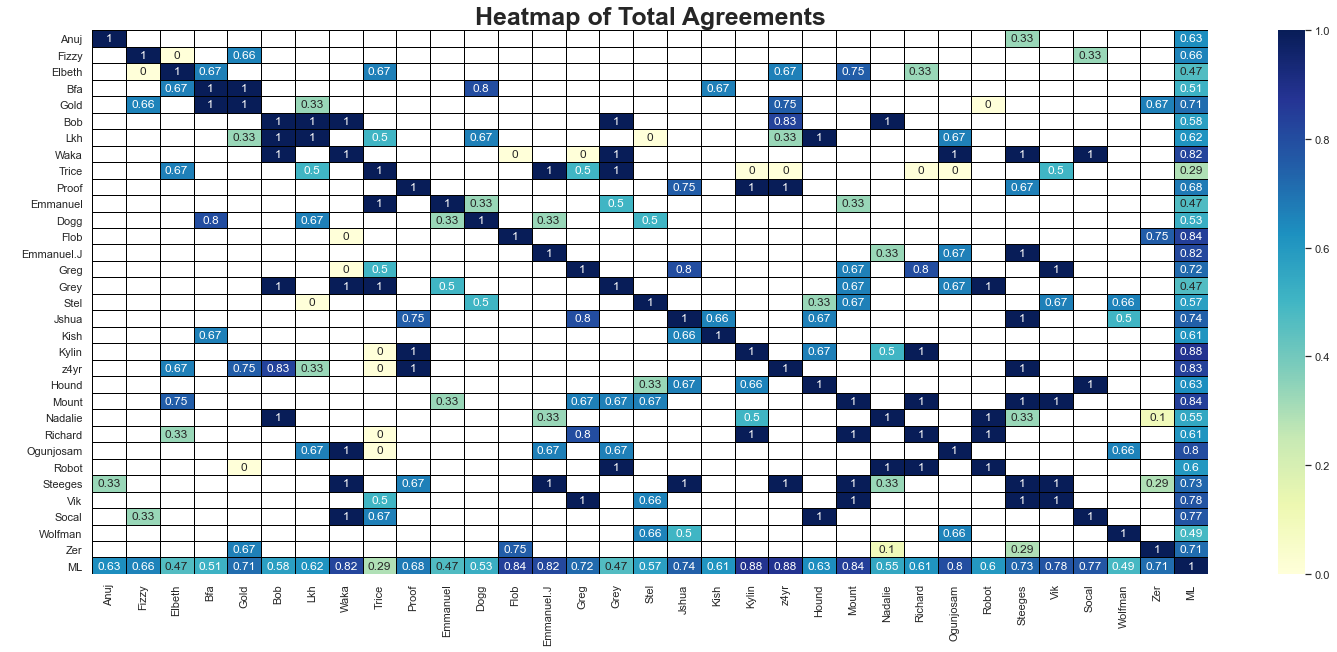

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt
# You can change the values here to your taste.
plt.figure(figsize=(25,10))
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
corr.rename({"Unnamed: 0": " "}, axis=1, inplace=True)
sns.heatmap(corr.set_index(" "), annot=True, cmap="YlGnBu", linecolor="black", linewidths=0.5)
plt.title("Heatmap of Total Agreements", fontsize=25, weight="bold")
plt.savefig("Heatmap_total_agreements.png")
plt.show()
